In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install apriori_python efficient-apriori fpgrowth_py pyarmviz numpy pandas matplotlib seaborn  scikit-learn matplotlib umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 658 kB 28.6 MB/s 
     |████████████████████████████████| 88 kB 5.8 MB/s 
     |████████████████████████████████| 1.1 MB 50.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=0f2f0c54c18a6376823170fa05a52d3b5f3d36cf66d1211862d87da0c9255c40
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55512 sha256=9918f98faf6aa89cf93f3a6b443e44c72c97c6eff5c81d791e5a326011dbbfed
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from umap import UMAP


warnings.filterwarnings("ignore")

%matplotlib inline

Counter({1: 60, 0: 40})
Counter({1: 60, 0: 40})
dict_items([(0, 40), (1, 60)])
[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


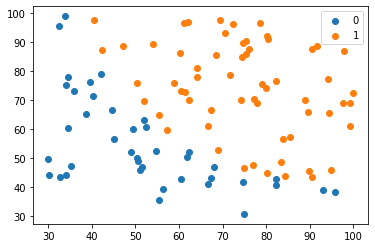

In [ ]:

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
'''For viz dataframe bewfore sampling'''

df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
# summarize class distribution
counter = Counter(y)
print(counter)

counter = Counter(y)
print(counter)
print(counter.items())
X = X.to_numpy()
y = y.to_numpy()
print(y)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()





Counter({0: 60, 1: 60})
dict_items([(0, 60), (1, 60)])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


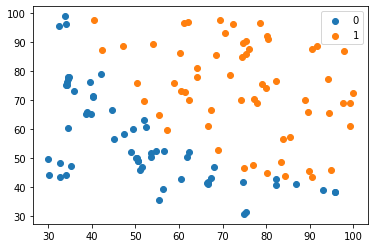

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
# define pipeline
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
print(counter.items())
X = X.to_numpy()
y = y.to_numpy()
print(y)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

ROC without SMOTE

In [ ]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
X = X.to_numpy()
y = y.to_numpy()
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.894


ROC with SMOTE

In [ ]:
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.889


ROCs with SMOTE different count of neighbours

In [ ]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from umap import UMAP
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
# X = X.to_numpy()
# y = y.to_numpy()

# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
  # define pipeline
  model = DecisionTreeClassifier()
  over = SMOTE( k_neighbors=k)
  under = RandomUnderSampler()
  steps = [('over', over), ('under', under), ('model', model)]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
  score = mean(scores)
  print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.899
> k=2, Mean ROC AUC: 0.893
> k=3, Mean ROC AUC: 0.878
> k=4, Mean ROC AUC: 0.890
> k=5, Mean ROC AUC: 0.912
> k=6, Mean ROC AUC: 0.894
> k=7, Mean ROC AUC: 0.878


# BorderLine SMOTE



(100, 2)


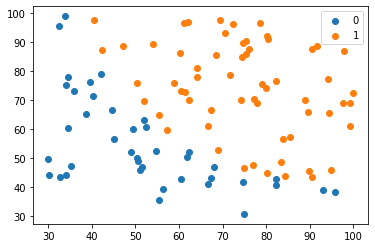

Counter({1: 60, 0: 40})
Counter({0: 60, 1: 60})


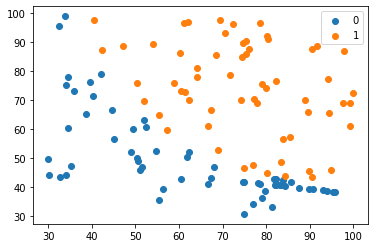

(100, 2)


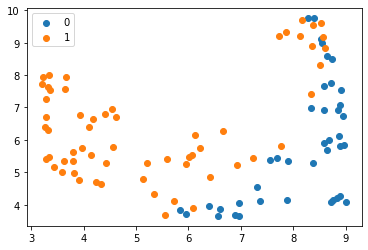

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(100, 2)


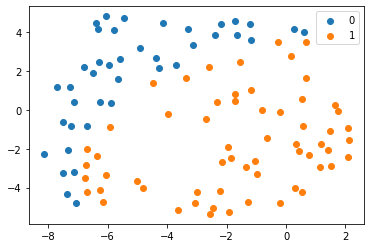

In [ ]:

# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
import numpy as np
import random
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from umap import UMAP
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
X = X.to_numpy()
y = y.to_numpy()
# summarize class distribution
embedded = X
#reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')
X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
X = X.to_numpy()
y = y.to_numpy()
scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = UMAP()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

reducer = TSNE()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({1: 60, 0: 40})
(100, 2)


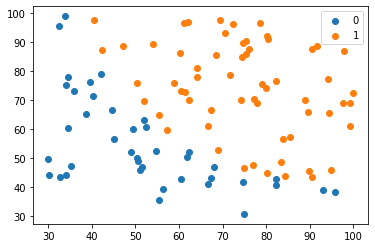

Counter({0: 60, 1: 60})


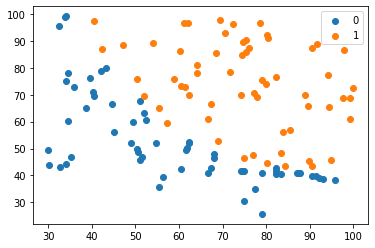

(100, 2)


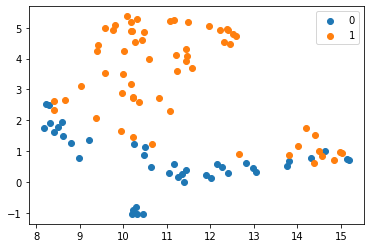

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(100, 2)


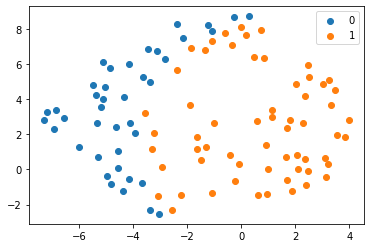

In [ ]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
X = X.to_numpy()
y = y.to_numpy()
# summarize class distribution
counter = Counter(y)
print(counter)


embedded = X
#reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()




df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')
X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
X = X.to_numpy()
y = y.to_numpy()
scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = UMAP()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

reducer = TSNE()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

(100, 2)


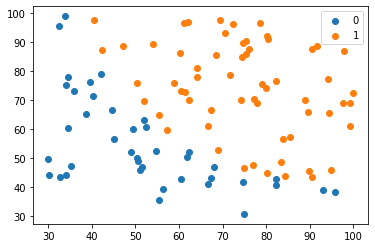

Counter({1: 60, 0: 40})
Counter({0: 60, 1: 60})


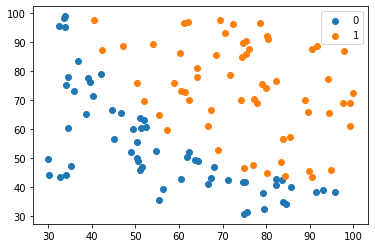

(100, 2)


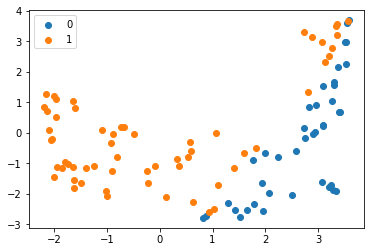

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(100, 2)


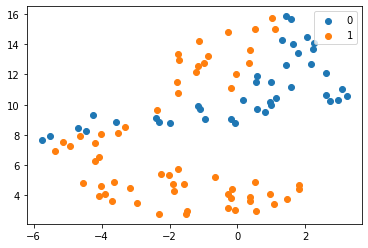

In [ ]:
from sklearn import preprocessing

# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
import plotly.express as px # для визуализации данных
# define dataset
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
X = X.to_numpy()
y = y.to_numpy()



embedded = X
#reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()




df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')
X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
X = X.to_numpy()
y = y.to_numpy()
scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = UMAP()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

reducer = TSNE()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
def pltWithScaler(rawData, ScalerName, reducer):
    scaled_data = ScalerName().fit_transform(rawData)
    embedded = reducer.fit_transform(scaled_data)
    print(embedded.shape)
    plt.scatter(
        embedded[:, 0],
        embedded[:, 1]
        # c=[sns.color_palette()[x] for x in tps.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
    )
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'{reducer.__class__.__name__} projection with {ScalerName.__name__} of the Ionsphere dataset', fontsize=24)
    plt.show()

In [ ]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from umap import UMAP
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import *
from imblearn.under_sampling import *

df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']
# X = X.to_numpy()
# y = y.to_numpy()
def compare_undersamplers(underSampler, overSampler=SMOTE ,classifier=SVC, scoring = "f1"):
    # values to evaluate
    k_values = [1, 2, 3, 4, 5, 6, 7]
    for k in k_values:
      # define pipeline
      model = classifier()
      over = overSampler( k_neighbors=k)
      under = underSampler()
      steps = [('over', over), ('under', under), ('model', model)]
      pipeline = Pipeline(steps=steps)
      # evaluate pipeline
      cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
      scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
      score = mean(scores)
      print('> %s k=%d, Mean %s: %.3f' % (under.__class__.__name__, k, scoring, score))
    print()

compare_undersamplers(ClusterCentroids)
compare_undersamplers(CondensedNearestNeighbour)
compare_undersamplers(EditedNearestNeighbours)
compare_undersamplers(RepeatedEditedNearestNeighbours)
compare_undersamplers(AllKNN)
compare_undersamplers(InstanceHardnessThreshold)
compare_undersamplers(NearMiss)
compare_undersamplers(NeighbourhoodCleaningRule)
compare_undersamplers(OneSidedSelection)
compare_undersamplers(RandomUnderSampler)
compare_undersamplers(TomekLinks)

> ClusterCentroids k=1, Mean f1: 0.858
> ClusterCentroids k=2, Mean f1: 0.853
> ClusterCentroids k=3, Mean f1: 0.867
> ClusterCentroids k=4, Mean f1: 0.866
> ClusterCentroids k=5, Mean f1: 0.865
> ClusterCentroids k=6, Mean f1: 0.856
> ClusterCentroids k=7, Mean f1: 0.865

> CondensedNearestNeighbour k=1, Mean f1: 0.757
> CondensedNearestNeighbour k=2, Mean f1: 0.762
> CondensedNearestNeighbour k=3, Mean f1: 0.773
> CondensedNearestNeighbour k=4, Mean f1: 0.745
> CondensedNearestNeighbour k=5, Mean f1: 0.750
> CondensedNearestNeighbour k=6, Mean f1: 0.724
> CondensedNearestNeighbour k=7, Mean f1: 0.778

> EditedNearestNeighbours k=1, Mean f1: 0.841
> EditedNearestNeighbours k=2, Mean f1: 0.845
> EditedNearestNeighbours k=3, Mean f1: 0.839
> EditedNearestNeighbours k=4, Mean f1: 0.851
> EditedNearestNeighbours k=5, Mean f1: 0.841
> EditedNearestNeighbours k=6, Mean f1: 0.837
> EditedNearestNeighbours k=7, Mean f1: 0.846

> RepeatedEditedNearestNeighbours k=1, Mean f1: 0.837
> RepeatedEd

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei